# Task 1 : Set up colab gpu runtime environment

In [ ]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

--2024-02-16 01:41:11--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py’

helper.py           100%[===================>]   2.75K  --.-KB/s    in 0s      

2024-02-16 01:41:11 (60.8 MB/s) - ‘helper.py’ saved [2813/2813]



In [ ]:
!pip install gdown==4.3.1

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for gdown: filename=gdown-4.3.1-py3-none-any.whl size=14472 sha256=e2da8af4853778b09c663be7238e75bf2fb2da41d4a0292bffdaac1e59fb4aad
  Stored in directory: /root/.cache/pip/wheels/e2/96/ae/e10e20acfcf61197f94419d57c2e228466b9f5cd3f326bb44a
Successfully built gdown
  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3


In [ ]:
!pip install segmentation-models-pytorch
!pip install -U git+https://github.com/albumentations-team/albumentations
!pip install --upgrade opencv-contrib-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 30.6 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16428 sha256=ffdbaf8dd7a9f47a158fd0225786917ca2c43262903a583c4b3c624d99867b9d
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=e441f6315a01d7df8d6d2a9c1433c9587eebb39940543daa624cc471a3b8eb41
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c60142835bfc889f9a482e4a67e0b817032d9c6883b64
Successfully built efficientnet-pytorch pretrainedmodels
  Cloning https://github.com/albumentations-team/albumenta

# Download Dataset


we use data from https://drive.google.com/uc?export=download&id=1XOBoRGSraP50_pS1YPB8_i8Wmw_5L-NG

In [ ]:
!gdown --id "1XOBoRGSraP50_pS1YPB8_i8Wmw_5L-NG" -O "tmp"

Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1XOBoRGSraP50_pS1YPB8_i8Wmw_5L-NG 



In [ ]:
!nvidia-smi

# Some Common Imports

In [ ]:
import sys

In [ ]:
import torch
import cv2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from torch.nn.functional import one_hot
import pandas as pd
import helper

from torch.utils.data import Dataset
import os
import numpy as np
from glob import glob

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive



# use personal drive to get data set



In [ ]:
!cp "/content/gdrive/MyDrive/LaPa.tar.gz" "/content/tmp"

In [ ]:
import os
if not os.path.exists('image'):
    os.makedirs('image')
!tar -xvf  '/content/tmp' -C '/content/image'

เอาต์พุตของการสตรีมมีการตัดเหลือเพียง 5000 บรรทัดสุดท้าย
LaPa/train/labels/2818584124_13.png
LaPa/train/labels/LFPW_image_test_0157_1.png
LaPa/train/labels/4595280121_4.png
LaPa/train/labels/HELEN_2761106136_1_3.png
LaPa/train/labels/HELEN_3005087184_1_0.png
LaPa/train/labels/5906318280_1.png
LaPa/train/labels/HELEN_126968967_1_0.png
LaPa/train/labels/LFPW_image_test_0157_2.png
LaPa/train/labels/AFW_5002723411_2_9.png
LaPa/train/labels/LFPW_image_train_0292_6.png
LaPa/train/labels/12016442526_0.png
LaPa/train/labels/LFPW_image_train_0789_7.png
LaPa/train/labels/LFPW_image_train_0588_0.png
LaPa/train/labels/HELEN_173808384_2_5.png
LaPa/train/labels/6531382301_15.png
LaPa/train/labels/HELEN_2707642369_1_4.png
LaPa/train/labels/12268264184_13.png
LaPa/train/labels/71244599_2.png
LaPa/train/labels/6259612800_2.png
LaPa/train/labels/AFW_4906266640_1_1.png
LaPa/train/labels/HELEN_2414075021_1_0.png
LaPa/train/labels/HELEN_2233737284_1_3.png
LaPa/train/labels/HELEN_1419222657_1_1.png
LaPa/tra

# Task : 2 Setup Configurations
Select encoder : https://segmentation-modelspytorch.readthedocs.io/en/latest/


In [ ]:
DATA_DIR = "image/LaPa"
PREPROCESS_DIR = "pre/LaPa"

DEVICE = 'cuda'

EPOCHS = 50
LR = 0.0001
IMAGE_SIZE = 224
BATCH_SIZE = 16
num_classes = 11
ENCODER = 'mobilenet_v2'
WEIGHTS = 'imagenet'

In [ ]:

print(len(glob(os.path.join(DATA_DIR, "train", "images", "*.jpg"))))

18168


In [ ]:
global image_h
global image_w
global num_classes
global classes
global rgb_codes

def create_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)

def load_dataset(path):
    train_x = sorted(glob(os.path.join(path, "train", "images", "*.jpg")))
    train_y = sorted(glob(os.path.join(path, "train", "labels", "*.png")))

    valid_x = sorted(glob(os.path.join(path, "val", "images", "*.jpg")))
    valid_y = sorted(glob(os.path.join(path, "val", "labels", "*.png")))

    test_x = sorted(glob(os.path.join(path, "test", "images", "*.jpg")))
    test_y = sorted(glob(os.path.join(path, "test", "labels", "*.png")))

    return (train_x, train_y), (valid_x, valid_y), (test_x, test_y)

def read_image_mask(x, y):
    """ Image """
    x = cv2.imread(x, cv2.IMREAD_COLOR)
    x = cv2.resize(x, (image_w, image_h))
    x = x/255.0
    x = x.astype(np.float32)

    """ Mask """
    y = cv2.imread(y, cv2.IMREAD_GRAYSCALE)
    y = cv2.resize(y, (image_w, image_h))
    y = y.astype(np.int32)

    return x, y

def preprocess(path,pre_path):

    process_type = ["train","val","test"]
    if not os.path.exists('pre'):
        for t in process_type:
            os.makedirs('pre/LaPa/' + t + "/images/")
            os.makedirs('pre/LaPa/' + t + "/labels/")
    for t in process_type:
        img_x_url = sorted(glob(os.path.join(path,t,"images","*.jpg")))
        img_y_url = sorted(glob(os.path.join(path,t,"labels","*.png")))
        for x_url,y_url in tqdm(zip(img_x_url,img_y_url),total = len(img_x_url)):
            img = cv2.imread(x_url)
            mask = cv2.imread(y_url,0)
            img = cv2.resize(img,(224,224),interpolation= cv2.INTER_AREA)
            mask = cv2.resize(mask,(224,224),interpolation= cv2.INTER_AREA)
            cv2.imwrite(x_url.replace(path,pre_path),img)
            cv2.imwrite(y_url.replace(path,pre_path),mask)


In [ ]:
preprocess(DATA_DIR,PREPROCESS_DIR)

  0%|          | 0/18168 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

  0%|          | 0/2000 [00:00<?, ?it/s]

# Task 3 : Augmentation Functions

albumentation documentation : https://albumentations.ai/docs/

In [ ]:
import albumentations as A

In [ ]:
def get_train_augs():
  return A.Compose([

      A.Resize(IMAGE_SIZE, IMAGE_SIZE),
      A.HorizontalFlip(p = 0.5),
      #A.Normalize(mean= (0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
     #A.augmentations.geometric.rotate.Rotate(limit = (-15,15))

  ], is_check_shapes=False)

def get_valid_augs():
  return A.Compose([
      A.Resize(IMAGE_SIZE, IMAGE_SIZE),
      #A.Normalize(mean= (0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)),
  ], is_check_shapes=False)

# Task 4 : Create Custom Dataset

In [ ]:
class SegmentationDataset(Dataset):
  def __init__(self, data, augmentations):
    self.DataX= data[0]
    self.DataY =data[1]
    self.augmentations = augmentations

  def __len__(self):
    return len(self.DataX)

  def __getitem__(self, idx):
    image_path = self.DataX[idx]
    mask_path = self.DataY[idx]

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    mask = cv2.imread(mask_path, 0 )
    #mask = np.expand_dims(mask,axis = -1)

    if self.augmentations:
      data = self.augmentations(image = image, mask = mask)
      image = data['image']
      mask = data['mask']
    image = np.transpose(image, (2,0,1)).astype(np.float32)

    image = torch.Tensor(image) / 255.0
    #print(image.max())
    mask = torch.round(torch.Tensor(mask) / 1.0)
    #mask = mask.unsqueeze(0)
    mask = mask.long()

    return image, mask

In [ ]:

train, val, test = load_dataset(PREPROCESS_DIR)
trainset = SegmentationDataset(train, get_train_augs())
validset = SegmentationDataset(val, get_valid_augs())
test = SegmentationDataset(test, get_valid_augs())

# Evaluate Dataset reading speed

In [ ]:
for images,label in tqdm(trainset):
    continue

  0%|          | 0/18168 [00:00<?, ?it/s]

In [ ]:
for images,label in tqdm(validset):
    continue

  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
for images,label in tqdm(test):
    continue

  0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
def show_image(image,mask,pred_image = None):
    from torch.nn.functional import one_hot

    if pred_image == None:

        f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))

        ax1.set_title('IMAGE')
        ax1.imshow(image.permute(1,2,0).squeeze(),cmap = 'gray')


        masks = one_hot(mask,11)
        masks = masks.permute(2,0,1)

        ax2.set_title('GROUND TRUTH')
        grayscale_images = torch.Tensor(np.argmax(masks.numpy(), axis=0) * (255 / (masks.shape[0] - 1)))
        ax2.imshow(grayscale_images.permute(0,1).squeeze(),cmap = 'gray')

    elif pred_image != None :

        f, (ax1, ax2,ax3) = plt.subplots(1, 3, figsize=(10,5))

        ax1.set_title('IMAGE')
        ax1.imshow(image.permute(1,2,0).squeeze(),cmap = 'gray')

        ax2.set_title('GROUND TRUTH')


        masks = one_hot(mask,11)
        masks = masks.permute(2,0,1)

        grayscale_images = torch.Tensor(np.argmax(masks.numpy(), axis=0) * (255 / (masks.shape[0] - 1)))
        ax2.imshow(grayscale_images.permute(0,1).squeeze(),cmap = 'gray')

        ax3.set_title('MODEL OUTPUT')
        pred_image = torch.Tensor(np.argmax(pred_image.numpy(), axis=0) * (255 / (pred_image.shape[0] - 1)))
        ax3.imshow(pred_image.permute(0,1).squeeze(),cmap = 'gray')

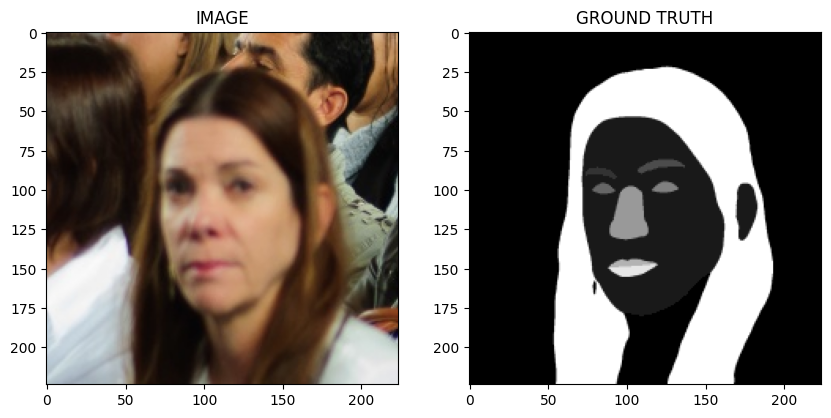

In [ ]:
idx = 42
image, mask = trainset[idx]
show_image(image,mask)

In [ ]:
print(mask.shape)

torch.Size([224, 224])


# Task 5 : Load dataset into batches

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
trainloader = DataLoader(trainset, batch_size=BATCH_SIZE,shuffle=True)
validloader = DataLoader(validset, batch_size=BATCH_SIZE)

In [ ]:
testloader = DataLoader(test, batch_size=BATCH_SIZE)

In [ ]:
for images,labes in tqdm(trainloader):
    continue

  0%|          | 0/1136 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
print(f"Size of Trainset : {len(trainset)}")
print(f"Size of Validset : {len(validset)}")

Size of Trainset : 18168
Size of Validset : 2000


In [ ]:
for image, mask in trainloader:
  break

print(f"One batch image shape : {image.shape}")
print(f"One batch mask shape : {mask.shape}")

One batch image shape : torch.Size([16, 3, 224, 224])
One batch mask shape : torch.Size([16, 224, 224])


# Task 6 : Create Segmentation Model

segmentation_models_pytorch documentation : https://smp.readthedocs.io/en/latest/

In [ ]:
model_name = "model5"

In [ ]:
from torch import nn
import segmentation_models_pytorch as smp
from segmentation_models_pytorch.losses import FocalLoss

In [ ]:
class SegmentationModel(nn.Module):
  def __init__(self):
    super(SegmentationModel,self).__init__()

    self.arc = smp.UnetPlusPlus(
        encoder_name = ENCODER,
        encoder_weights = WEIGHTS,
        in_channels = 3,
        classes = num_classes,
        activation = None
    )
    print((self.arc.encoder.parameters()))
    for i,param in enumerate(self.arc.encoder.parameters()):
        #freeze 151 layer
        if (i > 20): break
        param.requires_grad = False
  def forward(self, images, masks = None):
    logits = self.arc(images)

    if masks != None:
      loss1 = FocalLoss(mode="multiclass")(logits,masks)
      #ignore unused class

      #loss1 = nn.CrossEntropyLoss()(logits,masks)
      return logits, loss1

    return logits




In [ ]:
model = SegmentationModel()
model.to(DEVICE)

<generator object Module.parameters at 0x7e35d1a3b760>


SegmentationModel(
  (arc): UnetPlusPlus(
    (encoder): MobileNetV2Encoder(
      (features): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): InvertedResidual(
          (conv): Sequential(
            (0): Conv2dNormActivation(
              (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
              (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
              (2): ReLU6(inplace=True)
            )
            (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          )
        )
        (2): InvertedResidual(
          (conv): Sequential(
       

In [ ]:
from torchsummary import summary

summary(model, (3, IMAGE_SIZE, IMAGE_SIZE))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 112, 112]             864
       BatchNorm2d-2         [-1, 32, 112, 112]              64
             ReLU6-3         [-1, 32, 112, 112]               0
            Conv2d-4         [-1, 32, 112, 112]             288
       BatchNorm2d-5         [-1, 32, 112, 112]              64
             ReLU6-6         [-1, 32, 112, 112]               0
            Conv2d-7         [-1, 16, 112, 112]             512
       BatchNorm2d-8         [-1, 16, 112, 112]              32
  InvertedResidual-9         [-1, 16, 112, 112]               0
           Conv2d-10         [-1, 96, 112, 112]           1,536
      BatchNorm2d-11         [-1, 96, 112, 112]             192
            ReLU6-12         [-1, 96, 112, 112]               0
           Conv2d-13           [-1, 96, 56, 56]             864
      BatchNorm2d-14           [-1, 96,

# Task 7 : Create Train and Validation Function

In [ ]:
def iou_score(pred_masks, masks):
    # You can comment out this line if you are passing tensors of equal shape
    # But if you are passing output from UNet or something it will most probably
    # be with the BATCH x 1 x H x W shape
     # BATCH x 1 x H x W => BATCH x H x W
    SMOOTH = 1e-6
    masks = one_hot(masks,num_classes)  # BATCH x 1 x H x W => BATCH x H x W
    masks = masks.permute((0,3,1,2))

    intersection = (pred_masks & masks).float().sum((1,2,3))  # Will be zero if Truth=0 or Prediction=0
    union = (pred_masks | masks).float().sum((1,2,3))         # Will be zzero if both are 0

    iou = (intersection + SMOOTH) / (union + SMOOTH)  # We smooth our devision to avoid 0/0

    return iou  # Or iou.mean() if you are interested in average across the batch

def train_fn(data_loader, model, optimizer):
  model.train()
  total_loss = 0.0
  total_iou = 0.0
  n = 0
  for images, masks in tqdm(data_loader):
    images = images.to(DEVICE)
    masks = masks.to(DEVICE)

    optimizer.zero_grad()
    ligits, loss = model(images, masks)

    loss.backward()
    optimizer.step()



    total_loss += loss.item()

    pred_masks = torch.sigmoid(ligits)
    pred_masks = (pred_masks > 0.5) * 1

    n += images.shape[0]
    total_iou += iou_score(pred_masks,masks).sum()

 # print(f"loss on dice multiclass {loss_dice}\nloss on classifier {loss_classifier}")
  return total_loss / len(data_loader) , total_iou / n




def eval_fn(data_loader, model):
  model.eval()
  total_loss = 0.0
  total_iou = 0.0
  n = 0
  with torch.no_grad():

    for images, masks in tqdm(data_loader):
      images = images.to(DEVICE)
      masks = masks.to(DEVICE)


      ligits, loss = model(images, masks)

      pred_masks = torch.sigmoid(ligits)
      pred_masks = (pred_masks > 0.5) * 1

      n += images.shape[0]
      total_iou += iou_score(pred_masks,masks).sum()
      total_loss += loss.item()
  #print(f"loss on dice multiclass {loss_dice}\nloss on classifier {loss_classifier}")
  return total_loss / len(data_loader) , total_iou/n




# Early Stop

In [ ]:
class EarlyStopper:
    def __init__(self,patience = 8,min_delta = 1e-4):
        self.min_delta = min_delta
        self.patience = patience
        self.counter = 0
        self.min_validation_loss = float('inf')
    def early_stop(self,validation_loss):
        if (validation_loss < self.min_validation_loss):
            self.counter = 0
            self.min_validation_loss = validation_loss
            return False
        elif (validation_loss > (self.min_validation_loss + self.min_delta)):
            self.counter += 1
            if (self.counter >= self.patience):
                return True
        return False

# Task 8 : Train Model


In [ ]:
def train(trainloader,validloader,EPOCHS = 50, LR = 0.0001,Step = 4,patience = 5):
    best_valid_loss = np.Inf
    metric = {
        "train_loss" : [],
        "val_loss" : [],
        "train_acc" : [],
        "val_acc" : []
    }
    model = SegmentationModel()
    model.to(DEVICE)
    optimizer = torch.optim.Adam(model.parameters(), lr = LR)
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer,step_size = Step,gamma = 0.5)
    early = EarlyStopper(patience = patience)
    for i in range(EPOCHS):
        train_loss , train_acc = train_fn(trainloader, model, optimizer)
        print(f"train loss : {train_loss}, train accuracy(mIou) : {train_acc}")
        valid_loss , valid_acc = eval_fn(validloader, model)

        metric["train_loss"].append(train_loss)
        metric["train_acc"].append(train_acc)

        print(f"valid loss : {valid_loss}, valid accuracy(mIou) : {valid_acc}")

        metric["val_loss"].append(valid_loss)
        metric["val_acc"].append(valid_acc)
        if (early.early_stop(valid_loss)):
            break

        if valid_loss < best_valid_loss:
            torch.save(model.state_dict(), f'/content/gdrive/MyDrive/{model_name}.pt')
            print('saved model')
            best_valid_loss = valid_loss

        print(f"Epoch : {i+1} Train_loss : {train_loss}, Train_accuracy : {train_acc} Valid_loss : {valid_loss} Valid_accuracy : {valid_acc}")
    return model , metric

In [ ]:
model , metric = train(trainloader,validloader,Step = 4,patience = 8)

<generator object Module.parameters at 0x7e35d1a3adc0>


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.29490777749804337, train accuracy(mIou) : 0.8036110401153564


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.09441912138462066, valid accuracy(mIou) : 0.9048222303390503
saved model
Epoch : 1 Train_loss : 0.29490777749804337, Train_accuracy : 0.8036110401153564 Valid_loss : 0.09441912138462066 Valid_accuracy : 0.9048222303390503


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.07973709189936413, train accuracy(mIou) : 0.9148731231689453


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.07498772859573365, valid accuracy(mIou) : 0.9155113697052002
saved model
Epoch : 2 Train_loss : 0.07973709189936413, Train_accuracy : 0.9148731231689453 Valid_loss : 0.07498772859573365 Valid_accuracy : 0.9155113697052002


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.06674716598026349, train accuracy(mIou) : 0.924480676651001


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.06601537150144578, valid accuracy(mIou) : 0.9235336780548096
saved model
Epoch : 3 Train_loss : 0.06674716598026349, Train_accuracy : 0.924480676651001 Valid_loss : 0.06601537150144578 Valid_accuracy : 0.9235336780548096


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.05962606359758532, train accuracy(mIou) : 0.9307252764701843


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.06230746918916702, valid accuracy(mIou) : 0.9270287752151489
saved model
Epoch : 4 Train_loss : 0.05962606359758532, Train_accuracy : 0.9307252764701843 Valid_loss : 0.06230746918916702 Valid_accuracy : 0.9270287752151489


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.055605608156659235, train accuracy(mIou) : 0.9342041015625


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.06073651283979416, valid accuracy(mIou) : 0.9282084107398987
saved model
Epoch : 5 Train_loss : 0.055605608156659235, Train_accuracy : 0.9342041015625 Valid_loss : 0.06073651283979416 Valid_accuracy : 0.9282084107398987


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.052457889237008254, train accuracy(mIou) : 0.9369487762451172


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.062087574988603594, valid accuracy(mIou) : 0.9271016716957092
Epoch : 6 Train_loss : 0.052457889237008254, Train_accuracy : 0.9369487762451172 Valid_loss : 0.062087574988603594 Valid_accuracy : 0.9271016716957092


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.05041839459806051, train accuracy(mIou) : 0.9386599659919739


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.05623251143097877, valid accuracy(mIou) : 0.9326938986778259
saved model
Epoch : 7 Train_loss : 0.05041839459806051, Train_accuracy : 0.9386599659919739 Valid_loss : 0.05623251143097877 Valid_accuracy : 0.9326938986778259


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.04832795310542512, train accuracy(mIou) : 0.9408228397369385


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.056381358176469804, valid accuracy(mIou) : 0.932201623916626
Epoch : 8 Train_loss : 0.04832795310542512, Train_accuracy : 0.9408228397369385 Valid_loss : 0.056381358176469804 Valid_accuracy : 0.932201623916626


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.04733515514428137, train accuracy(mIou) : 0.9416338801383972


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.0544827818274498, valid accuracy(mIou) : 0.9343422651290894
saved model
Epoch : 9 Train_loss : 0.04733515514428137, Train_accuracy : 0.9416338801383972 Valid_loss : 0.0544827818274498 Valid_accuracy : 0.9343422651290894


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.04616872875124846, train accuracy(mIou) : 0.9427553415298462


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.05515555828809738, valid accuracy(mIou) : 0.9334843754768372
Epoch : 10 Train_loss : 0.04616872875124846, Train_accuracy : 0.9427553415298462 Valid_loss : 0.05515555828809738 Valid_accuracy : 0.9334843754768372


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.04496176711047514, train accuracy(mIou) : 0.9440745115280151


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.05331651365756988, valid accuracy(mIou) : 0.9355807304382324
saved model
Epoch : 11 Train_loss : 0.04496176711047514, Train_accuracy : 0.9440745115280151 Valid_loss : 0.05331651365756988 Valid_accuracy : 0.9355807304382324


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.04430130131470538, train accuracy(mIou) : 0.9447376132011414


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.053509393304586414, valid accuracy(mIou) : 0.9353271722793579
Epoch : 12 Train_loss : 0.04430130131470538, Train_accuracy : 0.9447376132011414 Valid_loss : 0.053509393304586414 Valid_accuracy : 0.9353271722793579


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.043299325833648025, train accuracy(mIou) : 0.9457270503044128


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.053765278249979016, valid accuracy(mIou) : 0.93626469373703
Epoch : 13 Train_loss : 0.043299325833648025, Train_accuracy : 0.9457270503044128 Valid_loss : 0.053765278249979016 Valid_accuracy : 0.93626469373703


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.0427547627207364, train accuracy(mIou) : 0.9463359713554382


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.05273564976453781, valid accuracy(mIou) : 0.9366521239280701
saved model
Epoch : 14 Train_loss : 0.0427547627207364, Train_accuracy : 0.9463359713554382 Valid_loss : 0.05273564976453781 Valid_accuracy : 0.9366521239280701


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.04290217114940391, train accuracy(mIou) : 0.9462476968765259


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.05293978053331375, valid accuracy(mIou) : 0.9365615844726562
Epoch : 15 Train_loss : 0.04290217114940391, Train_accuracy : 0.9462476968765259 Valid_loss : 0.05293978053331375 Valid_accuracy : 0.9365615844726562


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.04219475362620408, train accuracy(mIou) : 0.9469788074493408


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.05239930856227875, valid accuracy(mIou) : 0.9377135038375854
saved model
Epoch : 16 Train_loss : 0.04219475362620408, Train_accuracy : 0.9469788074493408 Valid_loss : 0.05239930856227875 Valid_accuracy : 0.9377135038375854


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.04079324527132049, train accuracy(mIou) : 0.9484655857086182


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.05147351840138435, valid accuracy(mIou) : 0.9384714365005493
saved model
Epoch : 17 Train_loss : 0.04079324527132049, Train_accuracy : 0.9484655857086182 Valid_loss : 0.05147351840138435 Valid_accuracy : 0.9384714365005493


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.04075330231850311, train accuracy(mIou) : 0.9484608769416809


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.052711017459630964, valid accuracy(mIou) : 0.9383237957954407
Epoch : 18 Train_loss : 0.04075330231850311, Train_accuracy : 0.9484608769416809 Valid_loss : 0.052711017459630964 Valid_accuracy : 0.9383237957954407


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.04020754822274067, train accuracy(mIou) : 0.9490536451339722


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.05261684033274651, valid accuracy(mIou) : 0.9380595684051514
Epoch : 19 Train_loss : 0.04020754822274067, Train_accuracy : 0.9490536451339722 Valid_loss : 0.05261684033274651 Valid_accuracy : 0.9380595684051514


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.04036799716127013, train accuracy(mIou) : 0.9488227367401123


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.051781666427850724, valid accuracy(mIou) : 0.9387248158454895
Epoch : 20 Train_loss : 0.04036799716127013, Train_accuracy : 0.9488227367401123 Valid_loss : 0.051781666427850724 Valid_accuracy : 0.9387248158454895


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.039538245303818664, train accuracy(mIou) : 0.9498471617698669


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.05126357164978981, valid accuracy(mIou) : 0.9386234283447266
saved model
Epoch : 21 Train_loss : 0.039538245303818664, Train_accuracy : 0.9498471617698669 Valid_loss : 0.05126357164978981 Valid_accuracy : 0.9386234283447266


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.03972620576042944, train accuracy(mIou) : 0.9495598673820496


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.050430213809013365, valid accuracy(mIou) : 0.9396802186965942
saved model
Epoch : 22 Train_loss : 0.03972620576042944, Train_accuracy : 0.9495598673820496 Valid_loss : 0.050430213809013365 Valid_accuracy : 0.9396802186965942


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.03868116524306611, train accuracy(mIou) : 0.9507879018783569


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.0521173146367073, valid accuracy(mIou) : 0.9388425946235657
Epoch : 23 Train_loss : 0.03868116524306611, Train_accuracy : 0.9507879018783569 Valid_loss : 0.0521173146367073 Valid_accuracy : 0.9388425946235657


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.03811105966574552, train accuracy(mIou) : 0.95135098695755


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.051277500957250595, valid accuracy(mIou) : 0.9398381114006042
Epoch : 24 Train_loss : 0.03811105966574552, Train_accuracy : 0.95135098695755 Valid_loss : 0.051277500957250595 Valid_accuracy : 0.9398381114006042


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.038728884821364155, train accuracy(mIou) : 0.9506374001502991


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.05083786675333977, valid accuracy(mIou) : 0.9398893713951111
Epoch : 25 Train_loss : 0.038728884821364155, Train_accuracy : 0.9506374001502991 Valid_loss : 0.05083786675333977 Valid_accuracy : 0.9398893713951111


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.038147144550851116, train accuracy(mIou) : 0.9512789845466614


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.051561728179454806, valid accuracy(mIou) : 0.9386522173881531
Epoch : 26 Train_loss : 0.038147144550851116, Train_accuracy : 0.9512789845466614 Valid_loss : 0.051561728179454806 Valid_accuracy : 0.9386522173881531


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.03804086205798765, train accuracy(mIou) : 0.9513931274414062


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.050250129610300065, valid accuracy(mIou) : 0.9404696226119995
saved model
Epoch : 27 Train_loss : 0.03804086205798765, Train_accuracy : 0.9513931274414062 Valid_loss : 0.050250129610300065 Valid_accuracy : 0.9404696226119995


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.03783837902772857, train accuracy(mIou) : 0.951647937297821


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.05133204540610314, valid accuracy(mIou) : 0.9403095245361328
Epoch : 28 Train_loss : 0.03783837902772857, Train_accuracy : 0.951647937297821 Valid_loss : 0.05133204540610314 Valid_accuracy : 0.9403095245361328


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.03674710632472391, train accuracy(mIou) : 0.9528515338897705


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.0503615562915802, valid accuracy(mIou) : 0.9408696293830872
Epoch : 29 Train_loss : 0.03674710632472391, Train_accuracy : 0.9528515338897705 Valid_loss : 0.0503615562915802 Valid_accuracy : 0.9408696293830872


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.03645412444504319, train accuracy(mIou) : 0.9531518220901489


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.05052024415135384, valid accuracy(mIou) : 0.9409492015838623
Epoch : 30 Train_loss : 0.03645412444504319, Train_accuracy : 0.9531518220901489 Valid_loss : 0.05052024415135384 Valid_accuracy : 0.9409492015838623


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.03676657443767754, train accuracy(mIou) : 0.9528098106384277


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.05134237959980965, valid accuracy(mIou) : 0.9402814507484436
Epoch : 31 Train_loss : 0.03676657443767754, Train_accuracy : 0.9528098106384277 Valid_loss : 0.05134237959980965 Valid_accuracy : 0.9402814507484436


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.03621003792037479, train accuracy(mIou) : 0.9534216523170471


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.05139084801077843, valid accuracy(mIou) : 0.9409548044204712
Epoch : 32 Train_loss : 0.03621003792037479, Train_accuracy : 0.9534216523170471 Valid_loss : 0.05139084801077843 Valid_accuracy : 0.9409548044204712


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.03665377349514042, train accuracy(mIou) : 0.9530082941055298


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.05202288442850113, valid accuracy(mIou) : 0.9402747750282288
Epoch : 33 Train_loss : 0.03665377349514042, Train_accuracy : 0.9530082941055298 Valid_loss : 0.05202288442850113 Valid_accuracy : 0.9402747750282288


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.035527437354739705, train accuracy(mIou) : 0.9541781544685364


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.05055350077152252, valid accuracy(mIou) : 0.9413012266159058
Epoch : 34 Train_loss : 0.035527437354739705, Train_accuracy : 0.9541781544685364 Valid_loss : 0.05055350077152252 Valid_accuracy : 0.9413012266159058


  0%|          | 0/1136 [00:00<?, ?it/s]

train loss : 0.0352614809165407, train accuracy(mIou) : 0.9544846415519714


  0%|          | 0/125 [00:00<?, ?it/s]

valid loss : 0.051366703569889066, valid accuracy(mIou) : 0.9407232403755188


# Task 9 : visualize metric




In [ ]:
model.load_state_dict(torch.load(f'/content/gdrive/MyDrive/{model_name}.pt'))

<All keys matched successfully>

In [ ]:
for i,val in enumerate(metric["train_acc"]):
    metric["train_acc"][i] = val.cpu()

for i,val in enumerate(metric["val_acc"]):
    metric["val_acc"][i] = val.cpu()

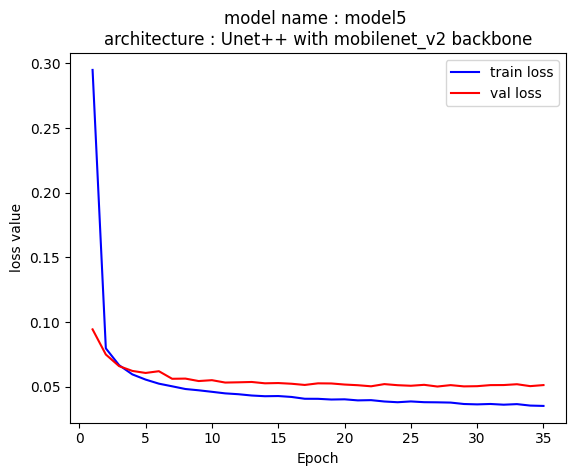

In [ ]:
# show loss
plt.plot(np.arange(1,len(metric["train_loss"]) + 1),metric["train_loss"],label = "train loss",c = 'blue')
plt.plot(np.arange(1,len(metric["val_loss"]) + 1),metric["val_loss"],label = "val loss",c = 'red')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("loss value")
plt.title(f"model name : {model_name} \narchitecture : Unet++ with {ENCODER} backbone")
plt.savefig(f"/content/gdrive/MyDrive/{model_name}_loss.png")
plt.show()

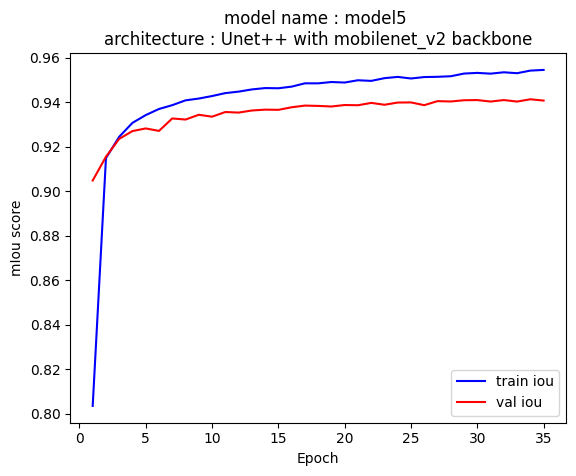

In [ ]:
# show iou score
plt.plot(np.arange(1,len(metric["train_acc"]) + 1),metric["train_acc"],label = "train iou",c = 'blue')
plt.plot(np.arange(1,len(metric["val_acc"]) + 1),metric["val_acc"],label = "val iou",c = 'red')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("mIou score")
plt.title(f"model name : {model_name} \narchitecture : Unet++ with {ENCODER} backbone")
plt.savefig(f"/content/gdrive/MyDrive/{model_name}_iou.png")
plt.show()


## interface

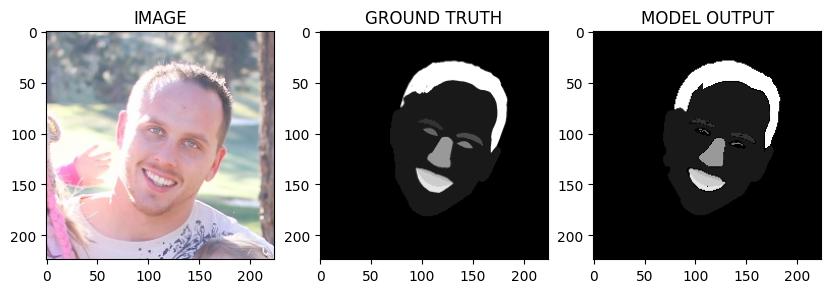

In [ ]:
model.eval()
with torch.no_grad():
    idx = 120
    image, mask = validset[idx]

    logits_mask = model(image.to(DEVICE).unsqueeze(0))
    pred_mask = torch.sigmoid(logits_mask)
    pred_mask = (pred_mask > 0.5) * 1.0

    show_image(image,mask,pred_mask.detach().cpu().squeeze(0))

In [ ]:
print(image.shape)
logits = model(image.to(DEVICE).unsqueeze(0))

torch.Size([3, 224, 224])


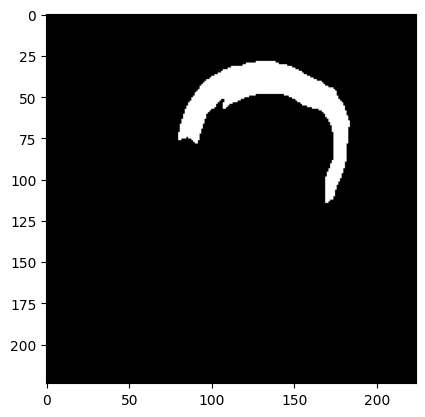

In [ ]:
plt.imshow(pred_mask.detach().cpu().squeeze(0)[10,:,:],cmap = 'gray')
plt.show()

# Task 10  Evaluation

In [ ]:
model.load_state_dict(torch.load(f'/content/gdrive/MyDrive/{model_name}.pt'))

<All keys matched successfully>

In [ ]:
def multi_iou_score(pred_masks, masks):
    # You can comment out this line if you are passing tensors of equal shape
    # But if you are passing output from UNet or something it will most probably
    # be with the BATCH x 1 x H x W shape
     # BATCH x 1 x H x W => BATCH x H x W
    SMOOTH = 1e-6
    masks = one_hot(masks,num_classes)  # BATCH x 1 x H x W => BATCH x H x W
    masks = masks.permute((0,3,1,2))

    intersection = (pred_masks & masks).float().sum((2,3))  # Will be zero if Truth=0 or Prediction=0
    union = (pred_masks | masks).float().sum((2,3))         # Will be zzero if both are 0

    iou = (intersection + SMOOTH) / (union + SMOOTH)  # We smooth our devision to avoid 0/0
    iou = torch.mean(iou,axis = 0)
    return iou  # Or iou.mean() if you are interested in average across the batch

In [ ]:
def eval_multi_fn(data_loader, model):
  model.eval()
  total_loss = 0.0
  total_iou = torch.zeros(num_classes)
  n = 0
  with torch.no_grad():

    for images, masks in tqdm(data_loader):
      images = images.to(DEVICE)
      masks = masks.to(DEVICE)


      ligits, loss = model(images, masks)

      pred_masks = torch.sigmoid(ligits)
      pred_masks = (pred_masks > 0.5) * 1

      n += images.shape[0]
      total_iou += multi_iou_score(pred_masks,masks).cpu()
      total_loss += loss.item()
  #print(f"loss on dice multiclass {loss_dice}\nloss on classifier {loss_classifier}")
  return total_loss / len(data_loader) , total_iou/len(data_loader)


class 0 = background

class 1 = skin

class 2 = left brown

class 3 = right brown

class 4 = left eye

class 5 = right eye

class 6 = nose

class 7 = upper lip

class 8 = mouth

class 9 = lower lip

class 10 = hair

In [ ]:
test_loss, test_iou = eval_multi_fn(testloader,model)


In [ ]:
test_criterion = pd.DataFrame(test_iou.numpy(),index = ["background","skin","left brown","right brown","left eye","right eye","nose","upper lip","mouth","lower lip","hair"],columns = ["mIoU Score each class"])
test_criterion.to_csv(f'/content/gdrive/MyDrive/{model_name}_test_class.csv')

In [ ]:
test_loss, test_iou = eval_fn(testloader,model)
print(f"evaluate loss : {test_loss} evaluate iou : {test_iou}")
with open(f'/content/gdrive/MyDrive/{model_name}_test.txt','w') as file:
    file.write(f"evaluate loss : {test_loss} evaluate iou : {test_iou}")

# For updates about upcoming and current guided projects follow me on...

Twitter : @parth_AI

Linkedin : www.linkedin.com/in/pdhameliya